In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import glob
from copy import deepcopy

In [2]:
results_folder = "results"
df_experiment = pd.DataFrame()
pd.set_option('display.max_columns', None)

In [3]:
print(f"{len(os.listdir(results_folder))} results")

80 results


In [4]:
df_special = 0

In [6]:
for experiment_folder in os.listdir(results_folder):
    experiment_files = os.listdir(os.path.join(results_folder,experiment_folder))[::-1]

    if len(experiment_files) != 3:
        continue
    
    for file in experiment_files:
        
        read_file = os.path.join(results_folder,experiment_folder,file)

        if "config" in file:
            df_config =pd.read_csv(read_file)
            
        if "test_metrics" in file:
            df_test = pd.read_csv(read_file)
            
        if "benchmark" in file:
            df_benchmark = pd.read_csv(read_file)

            if (df_config.algorithm.item()=="ga_joblib") and (df_config.model.item()=="mlp"):
                df_special = deepcopy(df_benchmark)
            
            avg_time = df_benchmark.Time.mean()
            avg_pop = df_benchmark.Avg.iloc[-1]
            best_pop = df_benchmark.Best.iloc[-1]
            worst_pop = df_benchmark.Worst.iloc[-1]
            
            df_benchmark = pd.DataFrame({"Time": [avg_time],"Avg":[avg_pop],"Worst":[worst_pop],"Best":[best_pop]})

    if (df_config.dataset.item()=="hiva_agnostic") and (df_config.model.item()=="xgboost"):
        print(df_config.algorithm.item())
        print(eval(df_test["Best Chromosome"].item().replace(" ",",")))  
            
    row = pd.concat((df_test,df_benchmark,df_config),axis=1)

    df_experiment = pd.concat((df_experiment,row))

print(len(df_experiment))

df_test = deepcopy(df_test)
df_benchmark = deepcopy(df_benchmark)
df_test[:] = np.NaN
df_benchmark[:] = np.NaN
for experiment_folder in os.listdir(results_folder):
    experiment_files = os.listdir(os.path.join(results_folder,experiment_folder))

    if len(experiment_files) < 3:

        
        read_file = os.path.join(results_folder,experiment_folder,"config.csv")
        df_config =pd.read_csv(read_file)

        if df_config.algorithm.item()!="rfs":
            continue

        row = pd.concat((df_test,df_benchmark,df_config),axis=1)
    
        df_experiment = pd.concat((df_experiment,row))

df_experiment = df_experiment.reset_index(drop=True)

baseline_metrics
[1, 1, 1, Ellipsis, 1, 1, 1]
ga_joblib
[0, 1, 1, Ellipsis, 1, 1, 1]
random
[0, 1, 1, Ellipsis, 0, 1, 1]
ga_seq
[0, 1, 1, Ellipsis, 1, 1, 1]
ga_joblib
[0, 1, 1, Ellipsis, 1, 1, 1]
ga_spark
[1, 0, 0, Ellipsis, 0, 0, 0]
55


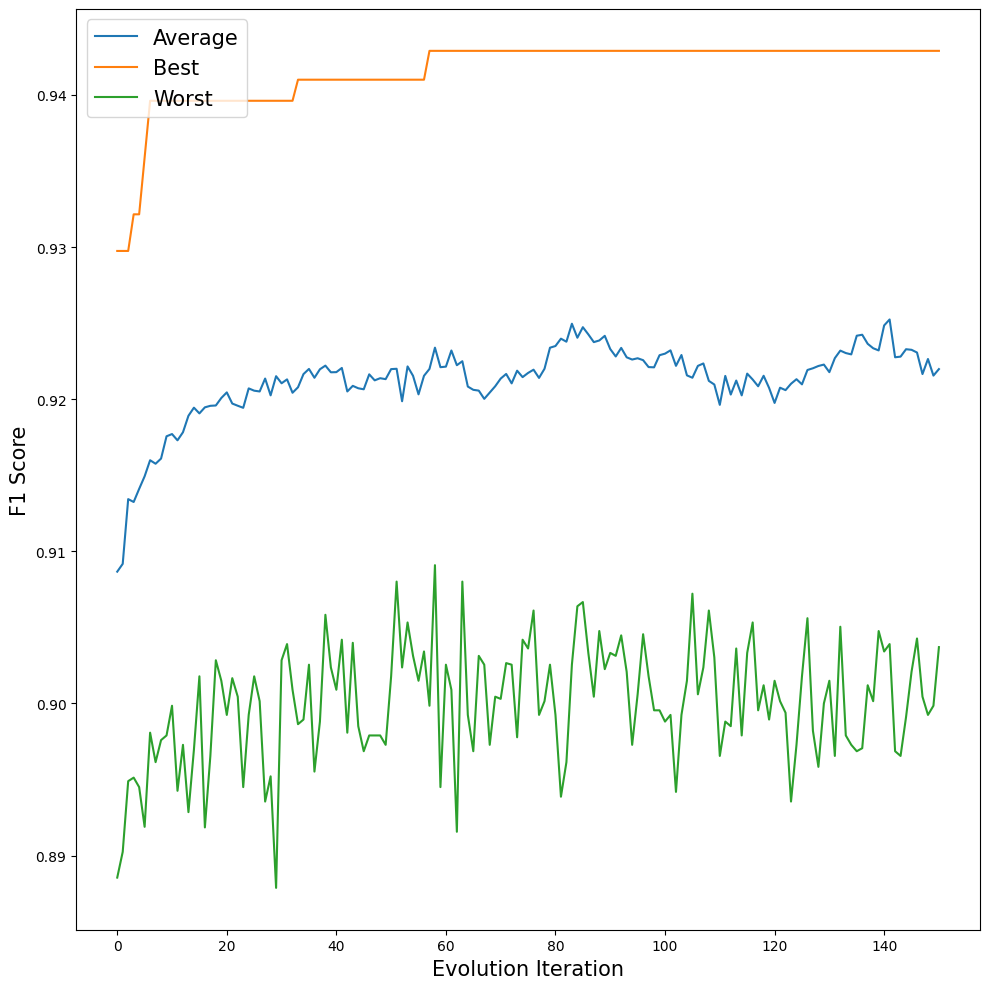

In [7]:
time = df_special.Gen
plt.figure(figsize=(10,10))
plt.plot(time,df_special.loc[:,["Avg","Best","Worst"]])
plt.legend(["Average","Best","Worst"],loc="upper left",fontsize=15)
plt.xlabel("Evolution Iteration",fontsize=15)
plt.ylabel("F1 Score",fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join("images","ga_validation.pdf"),dpi=1600)
plt.show()

In [ ]:
# import shutil
# for experiment_folder in os.listdir(results_folder):
#     experiment_files = os.listdir(os.path.join(results_folder,experiment_folder))
    
#     for file in experiment_files:
        
#         read_file = os.path.join(results_folder,experiment_folder,file)

        
        
#         if "config" in file:
#             df_config =pd.read_csv(read_file)

#             if df_config.algorithm.item() in ["ga_joblib","ga_seq","ga_spark","random"]:
#                 print(df_config.algorithm.item())
#                 shutil.rmtree(os.path.join(results_folder,experiment_folder))
#                 break
            
#         if "test_metrics" in file:
#             df_test = pd.read_csv(read_file)
            
#         if "benchmark" in file:
#             df_benchmark = pd.read_csv(read_file)

In [8]:
df_experiment[df_experiment.duplicated()]

,F1,Accuracy,ROC AUC,Best Chromosome,Time,Avg,Worst,Best,dataset,crossover_choice,mutation_rate,metric_choice,population_size,elitism,evolution_rounds,stopping_threshold,model,algorithm,backend_prefer
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hiva_agnostic,onepoint,0.2,f1,150,2,150,0.99999,logistic,rfs,processes
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hiva_agnostic,onepoint,0.2,f1,150,2,150,0.99999,xgboost,rfs,processes
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hiva_agnostic,onepoint,0.2,f1,150,2,150,0.99999,mlp,rfs,processes
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sylva_agnostic,onepoint,0.2,f1,150,2,150,0.99999,mlp,rfs,processes
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gina_agnostic,onepoint,0.2,f1,150,2,150,0.99999,mlp,rfs,processes
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sylva_agnostic,onepoint,0.2,f1,150,2,150,0.99999,xgboost,rfs,processes
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gina_agnostic,onepoint,0.2,f1,150,2,150,0.99999,xgboost,rfs,processes


In [9]:
df_metrics = df_experiment[df_experiment.backend_prefer=="processes"].reset_index(drop=True)

In [10]:
df_experiment.groupby(["model","algorithm","dataset"])[["F1","Accuracy","ROC AUC"]].mean(1).unstack(-1).stack(0).unstack()

dataset                   gina_agnostic                     hiva_agnostic  \
                               Accuracy        F1   ROC AUC      Accuracy   
model    algorithm                                                          
logistic baseline_metrics      0.798271  0.796512  0.798312      0.964539   
         ga_joblib             0.805476  0.799923  0.805248      0.965721   
         ga_seq                0.804035  0.795181  0.803579      0.966903   
         ga_spark              0.804035  0.795181  0.803579      0.962175   
         random                0.795389  0.793003  0.795388      0.962175   
         rfs                   0.801153  0.801153  0.801319           NaN   
mlp      baseline_metrics      0.878963  0.875000  0.878688      0.969267   
         ga_joblib             0.891451  0.889109  0.891331      0.971631   
         ga_seq                0.893372  0.890855  0.893225      0.971631   
         ga_spark              0.890490  0.888235  0.890384      0.971631   
         random                0.878963  0.875740  0.878771      0.971631   
xgboost  baseline_metrics      0.930836  0.928144  0.930489      0.969267   
         ga_joblib             0.925072  0.923753  0.925015      0.966903   
         ga_seq                0.925072  0.923977  0.925056      0.966903   
         ga_spark              0.925072  0.923529  0.924973      0.964539   
         random                0.930836  0.930636  0.930988      0.966903   

dataset                                       sylva_agnostic            \
                                 F1   ROC AUC       Accuracy        F1   
model    algorithm                                                       
logistic baseline_metrics  0.400000  0.660539       0.993056  0.943820   
         ga_joblib         0.431677  0.677206       0.991667  0.931034   
         ga_seq            0.461538  0.693873       0.993056  0.943820   
         ga_spark          0.428571  0.691422       0.991667  0.931034   
         random            0.384615  0.659314       0.993750  0.949153   
         rfs                    NaN       NaN       0.987500  0.895349   
mlp      baseline_metrics  0.380952  0.630882       0.993056  0.943820   
         ga_joblib         0.500000  0.696324       0.993750  0.949721   
         ga_seq            0.500000  0.696324       0.993750  0.949721   
         ga_spark          0.500000  0.696324       0.993750  0.949721   
         random            0.454545  0.664216       0.990972  0.928962   
xgboost  baseline_metrics  0.315789  0.598775       0.991667  0.931818   
         ga_joblib         0.363636  0.629657       0.994444  0.955056   
         ga_seq            0.363636  0.629657       0.994444  0.955056   
         ga_spark          0.285714  0.596324       0.992361  0.937853   
         random            0.300000  0.597549       0.992361  0.937853   

dataset                              
                            ROC AUC  
model    algorithm                   
logistic baseline_metrics  0.970060  
         ga_joblib         0.953576  
         ga_seq            0.970060  
         ga_spark          0.953576  
         random            0.970430  
         rfs               0.930364  
mlp      baseline_metrics  0.970060  
         ga_joblib         0.975678  
         ga_seq            0.975678  
         ga_spark          0.975678  
         random            0.974197  
xgboost  baseline_metrics  0.958824  
         ga_joblib         0.976048  
         ga_seq            0.976048  
         ga_spark          0.964442  
         random            0.964442

In [ ]:
# # FOLDER REMOVING SCRIPT, SKIP IT #

# import shutil
# ct = 0
# for experiment_folder in os.listdir(results_folder):
#     experiment_files = os.listdir(os.path.join(results_folder,experiment_folder))

#     # if len(experiment_files) != 3:
#     #     continue
    
#     for file in experiment_files:
        
#         read_file = os.path.join(results_folder,experiment_folder,file)

#         if "config" in file:
#             df_config =pd.read_csv(read_file)
        
#             if df_config["algorithm"][0] == "ga_spark":
#                 # print(df_config["algorithm"])
#                 # print(df_config["model"])
#                 # print(df_config["dataset"])
#                 # print(read_file)
#                 print(os.path.join(results_folder,experiment_folder))
#                 # shutil.rmtree(os.path.join(results_folder,experiment_folder))
#                 ct += 1
# print(ct)

In [ ]:
# # TEST SCRIPT, SKIP #

# ct = 0
# algor = "baseline_metrics"
# for experiment_folder in os.listdir(results_folder):
#     experiment_files = os.listdir(os.path.join(results_folder,experiment_folder))

#     # if len(experiment_files) != 3:
#     #     continue
    
#     for file in experiment_files:
        
#         read_file = os.path.join(results_folder,experiment_folder,file)

#         if "config" in file:
#             df_config =pd.read_csv(read_file)
        
#             if df_config["algorithm"][0] == algor:
#                 print()
#                 print(df_config["model"][0])
#                 print(df_config["dataset"][0])
#                 print(os.path.join(results_folder,experiment_folder))
#                 ct += 1
# print(ct)

In [11]:
models = ["mlp","xgboost","logistic"]
datasets = ["gina_agnostic","hiva_agnostic","sylva_agnostic"]
algorithms = ["baseline_metrics","rfs","ga_seq","random","ga_joblib","ga_spark"][::-1]

In [12]:
df_metrics = df_experiment.groupby(["dataset","model","algorithm"])[["F1","Accuracy","ROC AUC"]].mean().unstack(level="dataset").reindex(index=algorithms, level=1).reindex(index=models,level=0).stack(0,dropna=False).unstack()#.swaplevel(0, 1).sort_index(axis=1, level=0)
df_metrics = df_metrics.applymap(lambda x: str(np.round(x,3)))
df_metrics.loc["mlp"].loc["rfs"] = "NaN"
df_metrics

C:\Users\lpott\AppData\Local\Temp\ipykernel_5864\3545325518.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_metrics = df_metrics.applymap(lambda x: str(np.round(x,3)))


dataset                   gina_agnostic                hiva_agnostic         \
                               Accuracy     F1 ROC AUC      Accuracy     F1   
model    algorithm                                                            
mlp      ga_spark                  0.89  0.888    0.89         0.972    0.5   
         ga_joblib                0.891  0.889   0.891         0.972    0.5   
         random                   0.879  0.876   0.879         0.972  0.455   
         ga_seq                   0.893  0.891   0.893         0.972    0.5   
         rfs                        NaN    NaN     NaN           NaN    NaN   
         baseline_metrics         0.879  0.875   0.879         0.969  0.381   
xgboost  ga_spark                 0.925  0.924   0.925         0.965  0.286   
         ga_joblib                0.925  0.924   0.925         0.967  0.364   
         random                   0.931  0.931   0.931         0.967    0.3   
         ga_seq                   0.925  0.924   0.925         0.967  0.364   
         rfs                        nan    nan     nan           nan    nan   
         baseline_metrics         0.931  0.928    0.93         0.969  0.316   
logistic ga_spark                 0.804  0.795   0.804         0.962  0.429   
         ga_joblib                0.805    0.8   0.805         0.966  0.432   
         random                   0.795  0.793   0.795         0.962  0.385   
         ga_seq                   0.804  0.795   0.804         0.967  0.462   
         rfs                      0.801  0.801   0.801           nan    nan   
         baseline_metrics         0.798  0.797   0.798         0.965    0.4   

dataset                           sylva_agnostic                 
                          ROC AUC       Accuracy     F1 ROC AUC  
model    algorithm                                               
mlp      ga_spark           0.696          0.994   0.95   0.976  
         ga_joblib          0.696          0.994   0.95   0.976  
         random             0.664          0.991  0.929   0.974  
         ga_seq             0.696          0.994   0.95   0.976  
         rfs                  NaN            NaN    NaN     NaN  
         baseline_metrics   0.631          0.993  0.944    0.97  
xgboost  ga_spark           0.596          0.992  0.938   0.964  
         ga_joblib           0.63          0.994  0.955   0.976  
         random             0.598          0.992  0.938   0.964  
         ga_seq              0.63          0.994  0.955   0.976  
         rfs                  nan            nan    nan     nan  
         baseline_metrics   0.599          0.992  0.932   0.959  
logistic ga_spark           0.691          0.992  0.931   0.954  
         ga_joblib          0.677          0.992  0.931   0.954  
         random             0.659          0.994  0.949    0.97  
         ga_seq             0.694          0.993  0.944    0.97  
         rfs                  nan          0.988  0.895    0.93  
         baseline_metrics   0.661          0.993  0.944    0.97

In [13]:
df_metrics.rename(level="algorithm",mapper={algo:algo.replace("_"," ").upper() for algo in algorithms},inplace=True)
df_metrics.rename(level="algorithm",mapper={"baseline metrics".upper():"baseline".upper()},inplace=True)
df_metrics.rename(level="dataset",columns={data:data.replace("_"," ").upper() for data in datasets},inplace=True)
print(df_metrics.to_latex(index=True,multicolumn_format="c"))

\begin{tabular}{lllllllllll}
\toprule
 & dataset & \multicolumn{3}{c}{GINA AGNOSTIC} & \multicolumn{3}{c}{HIVA AGNOSTIC} & \multicolumn{3}{c}{SYLVA AGNOSTIC} \\
 &  & Accuracy & F1 & ROC AUC & Accuracy & F1 & ROC AUC & Accuracy & F1 & ROC AUC \\
model & algorithm &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{6}{*}{mlp} & GA SPARK & 0.89 & 0.888 & 0.89 & 0.972 & 0.5 & 0.696 & 0.994 & 0.95 & 0.976 \\
 & GA JOBLIB & 0.891 & 0.889 & 0.891 & 0.972 & 0.5 & 0.696 & 0.994 & 0.95 & 0.976 \\
 & RANDOM & 0.879 & 0.876 & 0.879 & 0.972 & 0.455 & 0.664 & 0.991 & 0.929 & 0.974 \\
 & GA SEQ & 0.893 & 0.891 & 0.893 & 0.972 & 0.5 & 0.696 & 0.994 & 0.95 & 0.976 \\
 & RFS & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN \\
 & BASELINE & 0.879 & 0.875 & 0.879 & 0.969 & 0.381 & 0.631 & 0.993 & 0.944 & 0.97 \\
\cline{1-11}
\multirow[t]{6}{*}{xgboost} & GA SPARK & 0.925 & 0.924 & 0.925 & 0.965 & 0.286 & 0.596 & 0.992 & 0.938 & 0.964 \\
 & GA JOBLIB & 0.925 & 0.924 & 0.925 & 0.967 & 0.364 & 0.63 & 0

In [14]:
df_metrics

dataset            GINA AGNOSTIC                HIVA AGNOSTIC                 \
                        Accuracy     F1 ROC AUC      Accuracy     F1 ROC AUC   
model    algorithm                                                             
mlp      GA SPARK           0.89  0.888    0.89         0.972    0.5   0.696   
         GA JOBLIB         0.891  0.889   0.891         0.972    0.5   0.696   
         RANDOM            0.879  0.876   0.879         0.972  0.455   0.664   
         GA SEQ            0.893  0.891   0.893         0.972    0.5   0.696   
         RFS                 NaN    NaN     NaN           NaN    NaN     NaN   
         BASELINE          0.879  0.875   0.879         0.969  0.381   0.631   
xgboost  GA SPARK          0.925  0.924   0.925         0.965  0.286   0.596   
         GA JOBLIB         0.925  0.924   0.925         0.967  0.364    0.63   
         RANDOM            0.931  0.931   0.931         0.967    0.3   0.598   
         GA SEQ            0.925  0.924   0.925         0.967  0.364    0.63   
         RFS                 nan    nan     nan           nan    nan     nan   
         BASELINE          0.931  0.928    0.93         0.969  0.316   0.599   
logistic GA SPARK          0.804  0.795   0.804         0.962  0.429   0.691   
         GA JOBLIB         0.805    0.8   0.805         0.966  0.432   0.677   
         RANDOM            0.795  0.793   0.795         0.962  0.385   0.659   
         GA SEQ            0.804  0.795   0.804         0.967  0.462   0.694   
         RFS               0.801  0.801   0.801           nan    nan     nan   
         BASELINE          0.798  0.797   0.798         0.965    0.4   0.661   

dataset            SYLVA AGNOSTIC                 
                         Accuracy     F1 ROC AUC  
model    algorithm                                
mlp      GA SPARK           0.994   0.95   0.976  
         GA JOBLIB          0.994   0.95   0.976  
         RANDOM             0.991  0.929   0.974  
         GA SEQ             0.994   0.95   0.976  
         RFS                  NaN    NaN     NaN  
         BASELINE           0.993  0.944    0.97  
xgboost  GA SPARK           0.992  0.938   0.964  
         GA JOBLIB          0.994  0.955   0.976  
         RANDOM             0.992  0.938   0.964  
         GA SEQ             0.994  0.955   0.976  
         RFS                  nan    nan     nan  
         BASELINE           0.992  0.932   0.959  
logistic GA SPARK           0.992  0.931   0.954  
         GA JOBLIB          0.992  0.931   0.954  
         RANDOM             0.994  0.949    0.97  
         GA SEQ             0.993  0.944    0.97  
         RFS                0.988  0.895    0.93  
         BASELINE           0.993  0.944    0.97

In [15]:
df_times = df_experiment[df_experiment.backend_prefer=="processes"].reset_index(drop=True).groupby(["dataset","model","algorithm"])[["Time"]].mean().unstack(level="dataset").reindex(index=algorithms,level=1).reindex(index=models,level=0)
df_times = df_times.applymap(lambda x: str(np.round(x,3)))
df_times.columns = df_times.columns.droplevel(0)
df_times

C:\Users\lpott\AppData\Local\Temp\ipykernel_5864\2018475743.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_times = df_times.applymap(lambda x: str(np.round(x,3)))


dataset                   gina_agnostic hiva_agnostic sylva_agnostic
model    algorithm                                                  
mlp      ga_spark                17.541        46.471         20.441
         ga_joblib               13.558         35.05         20.806
         random                  280.24       503.329        493.163
         ga_seq                 250.116        494.79        535.266
         rfs                        nan           nan            nan
         baseline_metrics         2.259         5.301          3.589
xgboost  ga_spark                43.835        31.333          24.76
         ga_joblib                22.16        34.257         25.515
         random                 322.759        72.523        227.809
         ga_seq                  90.887        72.568         66.404
         rfs                        nan           nan            nan
         baseline_metrics         0.872         1.177          0.869
logistic ga_spark                 5.768         5.336          2.601
         ga_joblib                9.455         9.166          2.775
         random                  12.028        11.918         19.987
         ga_seq                   7.429        11.679         22.798
         rfs                  44954.382           nan      16359.015
         baseline_metrics         0.117         0.186           0.37

In [16]:
df_times.rename(level="algorithm",mapper={algo:algo.replace("_"," ").upper() for algo in algorithms},inplace=True)
df_times.rename(level="algorithm",mapper={"baseline metrics".upper():"baseline".upper()},inplace=True)
df_times.rename(level="dataset",columns={data:data.replace("_"," ").upper() for data in datasets},inplace=True)
print(df_times.to_latex(index=True,multicolumn_format="c"))

\begin{tabular}{lllll}
\toprule
 & dataset & GINA AGNOSTIC & HIVA AGNOSTIC & SYLVA AGNOSTIC \\
model & algorithm &  &  &  \\
\midrule
\multirow[t]{6}{*}{mlp} & GA SPARK & 17.541 & 46.471 & 20.441 \\
 & GA JOBLIB & 13.558 & 35.05 & 20.806 \\
 & RANDOM & 280.24 & 503.329 & 493.163 \\
 & GA SEQ & 250.116 & 494.79 & 535.266 \\
 & RFS & nan & nan & nan \\
 & BASELINE & 2.259 & 5.301 & 3.589 \\
\cline{1-5}
\multirow[t]{6}{*}{xgboost} & GA SPARK & 43.835 & 31.333 & 24.76 \\
 & GA JOBLIB & 22.16 & 34.257 & 25.515 \\
 & RANDOM & 322.759 & 72.523 & 227.809 \\
 & GA SEQ & 90.887 & 72.568 & 66.404 \\
 & RFS & nan & nan & nan \\
 & BASELINE & 0.872 & 1.177 & 0.869 \\
\cline{1-5}
\multirow[t]{6}{*}{logistic} & GA SPARK & 5.768 & 5.336 & 2.601 \\
 & GA JOBLIB & 9.455 & 9.166 & 2.775 \\
 & RANDOM & 12.028 & 11.918 & 19.987 \\
 & GA SEQ & 7.429 & 11.679 & 22.798 \\
 & RFS & 44954.382 & nan & 16359.015 \\
 & BASELINE & 0.117 & 0.186 & 0.37 \\
\cline{1-5}
\bottomrule
\end{tabular}



## Jaccard Overlap

In [17]:
import itertools

In [18]:
list(itertools.product(algorithms,algorithms))

[('ga_spark', 'ga_spark'),
 ('ga_spark', 'ga_joblib'),
 ('ga_spark', 'random'),
 ('ga_spark', 'ga_seq'),
 ('ga_spark', 'rfs'),
 ('ga_spark', 'baseline_metrics'),
 ('ga_joblib', 'ga_spark'),
 ('ga_joblib', 'ga_joblib'),
 ('ga_joblib', 'random'),
 ('ga_joblib', 'ga_seq'),
 ('ga_joblib', 'rfs'),
 ('ga_joblib', 'baseline_metrics'),
 ('random', 'ga_spark'),
 ('random', 'ga_joblib'),
 ('random', 'random'),
 ('random', 'ga_seq'),
 ('random', 'rfs'),
 ('random', 'baseline_metrics'),
 ('ga_seq', 'ga_spark'),
 ('ga_seq', 'ga_joblib'),
 ('ga_seq', 'random'),
 ('ga_seq', 'ga_seq'),
 ('ga_seq', 'rfs'),
 ('ga_seq', 'baseline_metrics'),
 ('rfs', 'ga_spark'),
 ('rfs', 'ga_joblib'),
 ('rfs', 'random'),
 ('rfs', 'ga_seq'),
 ('rfs', 'rfs'),
 ('rfs', 'baseline_metrics'),
 ('baseline_metrics', 'ga_spark'),
 ('baseline_metrics', 'ga_joblib'),
 ('baseline_metrics', 'random'),
 ('baseline_metrics', 'ga_seq'),
 ('baseline_metrics', 'rfs'),
 ('baseline_metrics', 'baseline_metrics')]

In [19]:
from scipy.spatial.distance import jaccard

In [20]:
def feature_jaccard_overlap(df,dataset,algorithms):
    pairwise_comparisons = list(itertools.product(algorithms,algorithms))
    df = df[df.dataset==dataset]
    df_overlap = pd.DataFrame(index=algorithms,columns=algorithms,dtype=float)
    for algo1,algo2 in pairwise_comparisons:
        try:
            chromosome1 = eval(df[df.algorithm==algo1]["Best Chromosome"].values[0].replace(" ",","))
            chromosome2 = eval(df[df.algorithm==algo2]["Best Chromosome"].values[0].replace(" ",","))
            overlap = 1-jaccard(chromosome1,chromosome2)
            # print(chromosome1,chromosome2)
            # print(algo1,algo2,overlap)
            df_overlap.loc[algo1.replace("\\",""),algo2.replace("\\","")] = overlap
        except:
            continue
            
    df_overlap.rename(level=0,mapper={algo:algo.replace("_"," ").upper() for algo in algorithms},inplace=True)
    df_overlap.rename(level=0,mapper={"baseline metrics".upper():"baseline".upper()},inplace=True)
    df_overlap.rename(level=0,mapper={algo:algo.replace("_"," ").upper() for algo in algorithms},inplace=True,axis=1)
    df_overlap.rename(level=0,mapper={"baseline metrics".upper():"baseline".upper()},inplace=True,axis=1)
    return df_overlap

df_subset = df_experiment[(df_experiment.backend_prefer=="processes") & (df_experiment.model=="logistic")].reset_index(drop=True)
df_logistic_overlap = feature_jaccard_overlap(df=df_subset,dataset="sylva_agnostic",algorithms=algorithms)

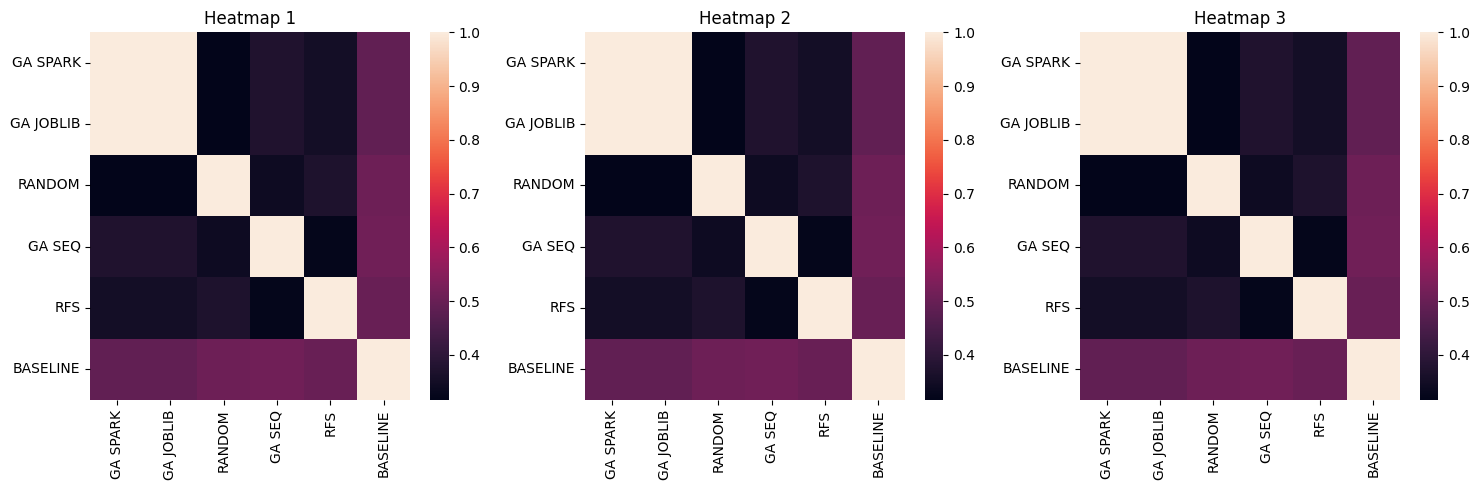

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plotting heatmaps on each subplot
for i, ax in enumerate(axes):
    df_subset = df_experiment[(df_experiment.backend_prefer=="processes") & (df_experiment.model=="logistic")].reset_index(drop=True)
    df_overlap = feature_jaccard_overlap(df=df_subset,dataset="sylva_agnostic",algorithms=algorithms)
    sns.heatmap(df_overlap, ax=ax)
    ax.set_title(f'Heatmap {i+1}')

plt.tight_layout()
plt.show()

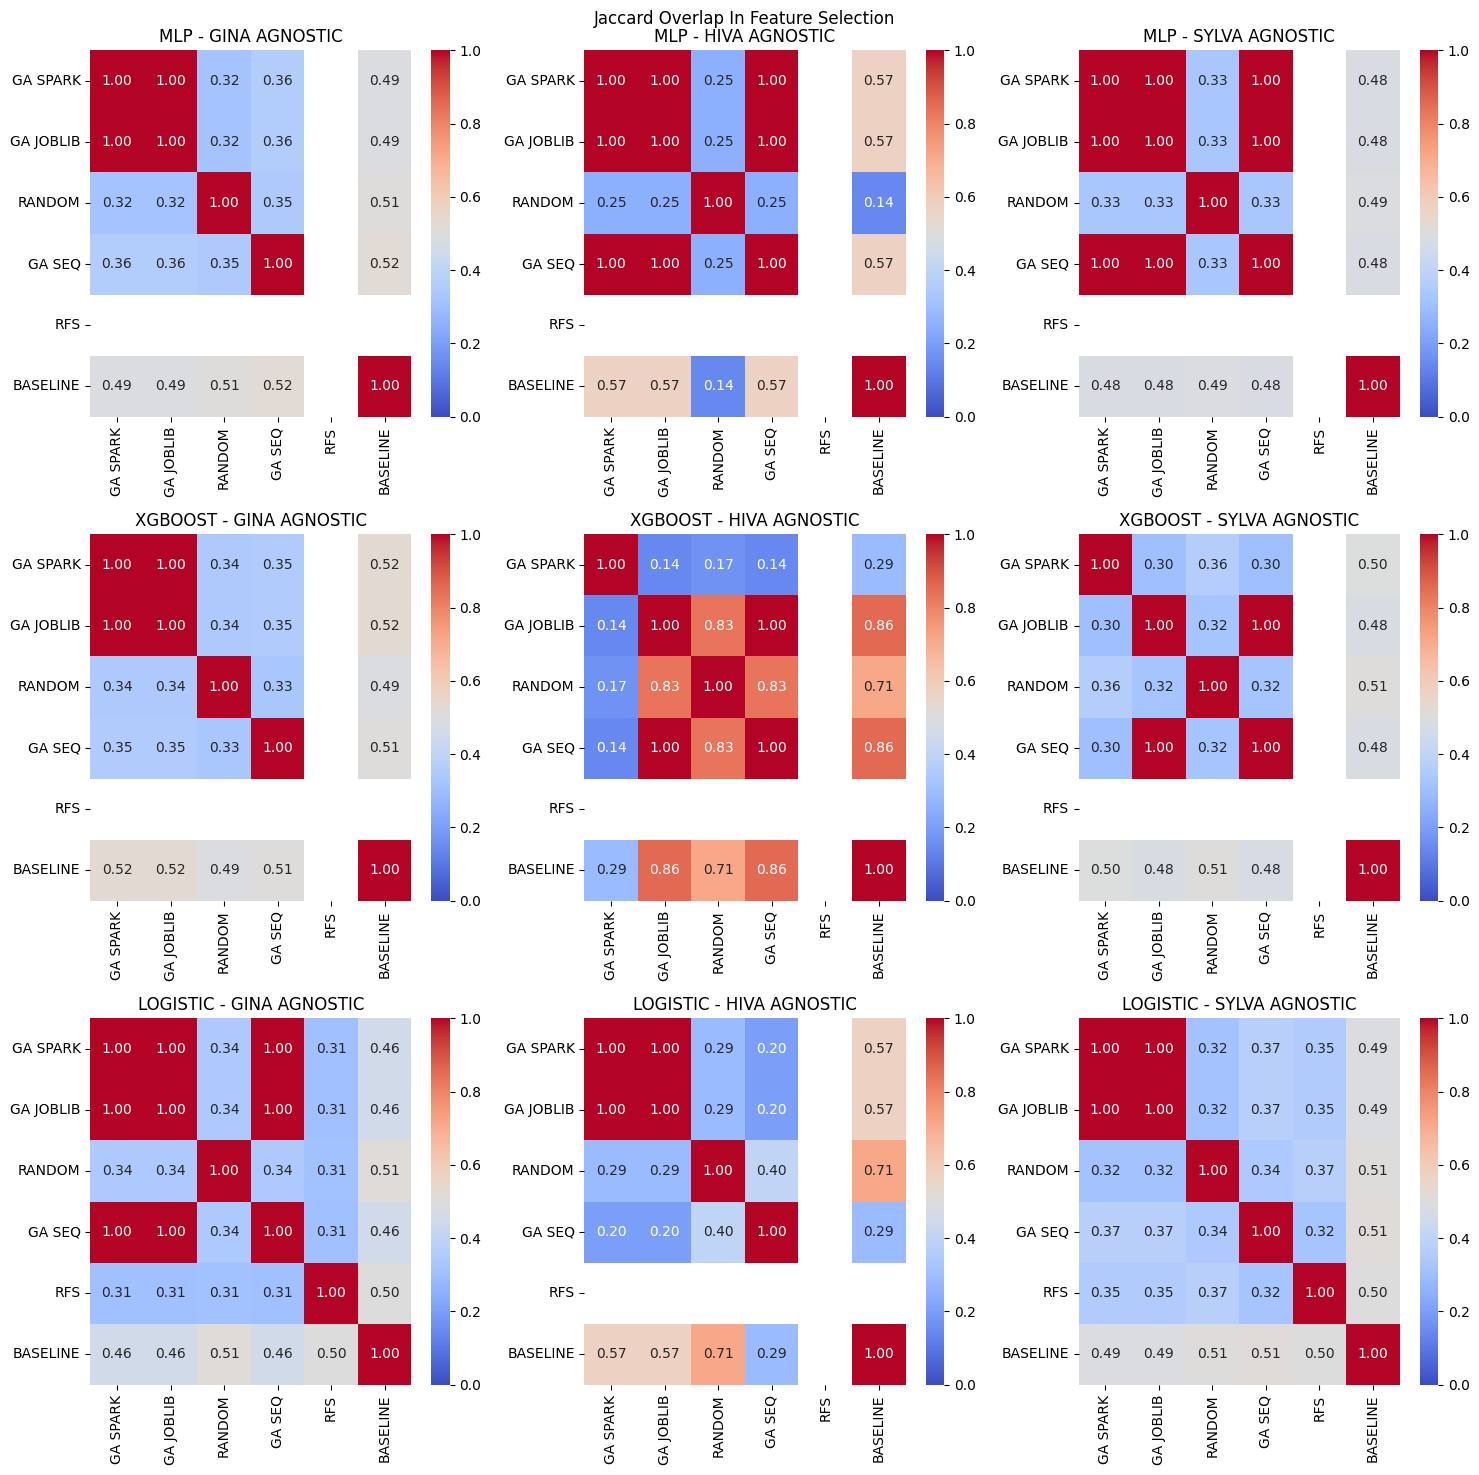

In [22]:
data = {
    (model, dataset): feature_jaccard_overlap(df=df_experiment[(df_experiment.model==model)],dataset=dataset,algorithms=algorithms)  # Sample data for each combination
    for model in models
    for dataset in datasets
}

# Creating a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 3 rows, 3 columns

# Plotting heatmaps on each subplot
for i, model in enumerate(models):
    for j, dataset in enumerate(datasets):
        sns.heatmap(data[(model, dataset)], ax=axes[i, j], cmap='coolwarm', vmin=0, vmax=1, annot=True, fmt='.2f')
        axes[i, j].set_title(f'{model} - {dataset.replace("_"," ")}'.upper())
        axes[i, j].set_xlabel('')  # Remove x-axis label for better readability
        axes[i, j].set_ylabel('') 

plt.suptitle("Jaccard Overlap In Feature Selection")
plt.tight_layout()
plt.savefig(os.path.join("images","jaccard_overlap.pdf"),dpi=1600)
plt.show()

## EXAMPLE IMAGE

In [ ]:
from colorama import Fore, Back, Style
from IPython.display import display, Latex

In [ ]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True,as_frame=True)
print(Fore.RED + "Full Dataset")
print(Fore.BLACK + f"{X[:5].to_string(index=False)}")
print()

c_l = np.array([0,0,1,1])
print(Fore.RED + "\nChromosome l")
display(Latex('$c_{l}$='+f'{c_l}'))
print()

X_ga = X.iloc[:,c_l==1]

print(Fore.RED + "Genetic Algorithm Subset")
print(Fore.BLACK + f"{X_ga[:5].to_string(index=False)}")